  
  
# Lab Assignment-8
# Cognitive Computing (UCS420)
# Logistic Regression on Iris Dataset
#Name:- Jatin Jindal
#Roll Number:- 102316061

Training Accuracy: 1.0
Testing Accuracy: 1.0


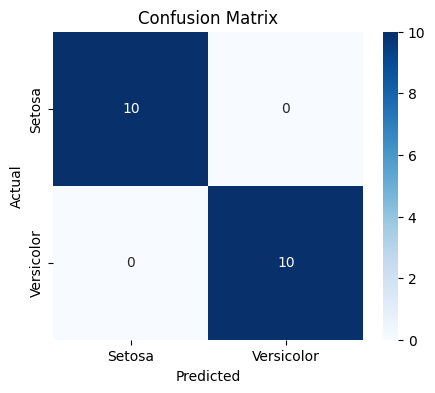


Classification Report:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20


Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Cross-Validation Accuracy: 1.0


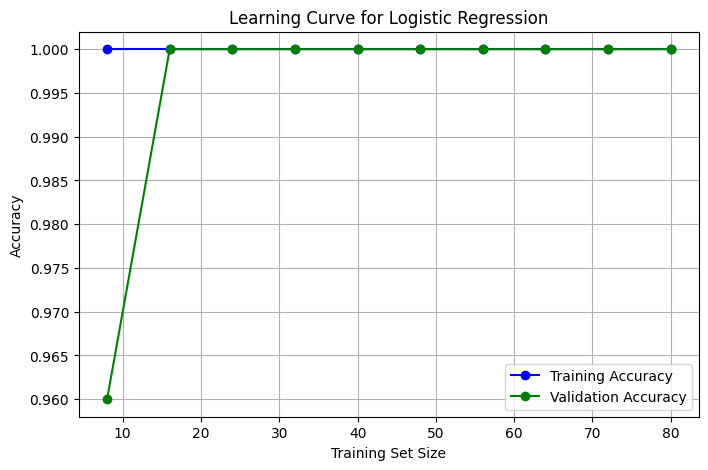

In [9]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Load the Iris dataset
iris_df = sns.load_dataset('iris')

# Modify dataset for binary classification (Setosa vs Versicolor)
binary_iris = iris_df[iris_df['species'].isin(['setosa', 'versicolor'])]

# Features and target variable
X = binary_iris.drop('species', axis=1)
y = binary_iris['species'].map({'setosa': 0, 'versicolor': 1})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_all_scaled = scaler.fit_transform(X)

# Train the logistic regression model
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Training and Testing Accuracy
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5,4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Setosa', 'Versicolor'],
            yticklabels=['Setosa', 'Versicolor'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred, target_names=['Setosa', 'Versicolor']))

# Cross-Validation using StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_all_scaled, y, cv=cv)

print("\nCross-Validation Scores:", np.round(cv_scores, 2))
print("Mean Cross-Validation Accuracy:", np.round(cv_scores.mean(), 2))

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    LogisticRegression(max_iter=500),
    X_all_scaled, y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=cv,
    shuffle=True,
    random_state=42,
    scoring='accuracy'
)

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Training Accuracy")
plt.plot(train_sizes, test_scores_mean, 'o-', color="green", label="Validation Accuracy")
plt.title('Learning Curve for Logistic Regression')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc="best")
plt.grid(True)
plt.show()
